In [32]:
import pandas as pd
import datetime
from datetime import date
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [14]:
symbol = 'SHAK'

In [26]:
end_time = date.today()
start_time = end_time - datetime.timedelta(days=30)


In [27]:
df_prices = yf.download(symbol, start=start_time.strftime("%Y-%m-%d"), end= end_time.strftime("%Y-%m-%d"), interval="1d")
# prices = pd.DataFrame({
#              symbol: {
#                  date: quote['Adj Close'] 
#                  for date, quote in ys.get_historical_prices(symbol, ,).iteritems()
#              }
#              for symbol in symbols
#          }, columns=symbols, dtype=float)
df_prices.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-24,83.930000,85.690002,82.714996,84.589996,84.589996,838700
2021-05-25,91.879997,93.709999,88.070000,88.379997,88.379997,3928800
2021-05-26,88.000000,91.629997,86.330002,90.660004,90.660004,1151400
2021-05-27,91.849998,96.040001,90.019997,95.669998,95.669998,1325400
2021-05-28,95.000000,96.099998,92.894997,93.980003,93.980003,983500


In [28]:
df_prices['daily_log_returns_shift'] = np.log(df_prices['Close'] / df_prices['Close'].shift(1))

In [29]:
df_prices

,Open,High,Low,Close,Adj Close,Volume,daily_log_returns_shift
Date,,,,,,,
2021-05-03,109.209999,110.400002,107.119003,107.790001,107.790001,595100,NaN
2021-05-04,106.879997,107.254997,102.559998,105.540001,105.540001,712800,-0.021095
2021-05-05,106.449997,107.470001,105.370003,106.320000,106.320000,508700,0.007363
2021-05-06,106.809998,106.820000,100.830002,105.620003,105.620003,1647000,-0.006606
2021-05-07,93.974998,95.980003,88.879997,89.480003,89.480003,3637700,-0.165833
2021-05-10,89.599998,91.089996,85.570000,89.760002,89.760002,2035200,0.003124
2021-05-11,87.000000,91.135002,86.230003,90.029999,90.029999,1078200,0.003003
2021-05-12,88.919998,89.180000,81.330002,82.000000,82.000000,1804100,-0.093424
2021-05-13,82.070000,84.379997,78.000000,79.480003,79.480003,1372800,-0.031214


In [30]:
cum_daily_return = (1 + df_prices['daily_log_returns_shift']).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

Date
2021-05-03         NaN
2021-05-04    0.978905
2021-05-05    0.986113
2021-05-06    0.979599
2021-05-07    0.817150
2021-05-10    0.819703
2021-05-11    0.822165
2021-05-12    0.745355
2021-05-13    0.722090
2021-05-14    0.755553
2021-05-17    0.759355
2021-05-18    0.784088
2021-05-19    0.759861
2021-05-20    0.755040
2021-05-21    0.758658
2021-05-24    0.766864
2021-05-25    0.800475
2021-05-26    0.820864
2021-05-27    0.865017
2021-05-28    0.849600
Name: daily_log_returns_shift, dtype: float64


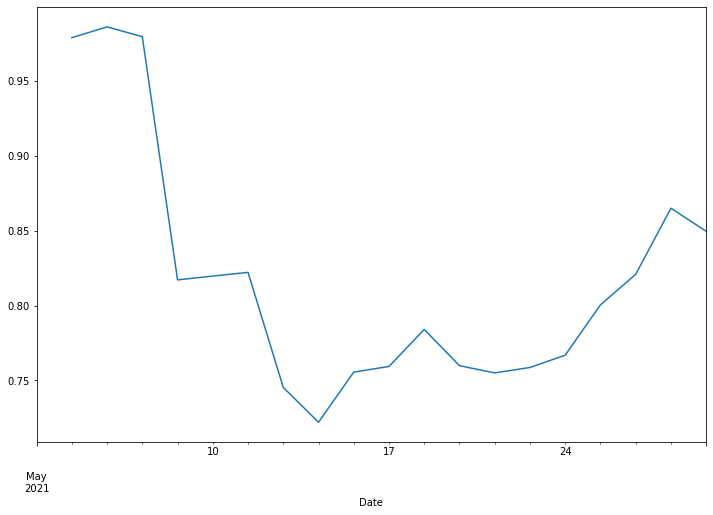

In [33]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()